In [10]:
import yfinance as yf

# Extracting Tesla stock data
tesla_data = yf.download('TSLA', start='2023-01-01', end='2024-01-01')

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(tesla_data.head())


[*********************100%%**********************]  1 of 1 completed

        Date        Open        High         Low       Close   Adj Close  \
0 2023-01-03  118.470001  118.800003  104.639999  108.099998  108.099998   
1 2023-01-04  109.110001  114.589996  107.519997  113.639999  113.639999   
2 2023-01-05  110.510002  111.750000  107.160004  110.339996  110.339996   
3 2023-01-06  103.000000  114.389999  101.809998  113.059998  113.059998   
4 2023-01-09  118.959999  123.519997  117.110001  119.769997  119.769997   

      Volume  
0  231402800  
1  180389000  
2  157986300  
3  220911100  
4  190284000  


In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing Tesla revenue data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the webpage using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing Tesla revenue data
table = soup.find('table')

# Extract data from the table and store it in a list of dictionaries
data = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) == 0:
        continue
    revenue = cols[0].text.strip()
    date = cols[1].text.strip()
    data.append({'Date': revenue , 'Revenue':date})

# Create a pandas DataFrame from the list of dictionaries
tesla_revenue = pd.DataFrame(data)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last five rows of the dataframe
print(tesla_revenue.tail())


    Date Revenue
8   2013  $2,013
9   2012    $413
10  2011    $204
11  2010    $117
12  2009    $112


In [18]:
import yfinance as yf

# Extracting GME (GameStop) stock data
gme_data = yf.download('GME', start='2023-01-01', end='2024-01-01')

# Reset the index
gme_data.reset_index(inplace=True)

# Save the dataframe to a CSV file
gme_data.to_csv('gme_stock_data.csv', index=False)

# Display the first five rows of the dataframe
print(gme_data.head())

[*********************100%%**********************]  1 of 1 completed

        Date       Open       High        Low      Close  Adj Close   Volume
0 2023-01-03  18.639999  19.260000  17.090000  17.200001  17.200001  5135200
1 2023-01-04  17.250000  17.930000  16.900000  17.320000  17.320000  3939300
2 2023-01-05  17.059999  17.260000  15.890000  16.219999  16.219999  6066200
3 2023-01-06  16.000000  16.570000  15.410000  16.459999  16.459999  4823400
4 2023-01-09  16.650000  17.129999  16.360001  16.379999  16.379999  3522600


In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing GME revenue data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the webpage using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing GME revenue data
table = soup.find('table')

# Extract data from the table and store it in a list of dictionaries
data = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) == 0:
        continue
    revenue = cols[0].text.strip()
    date = cols[1].text.strip()
    data.append({'Date':revenue , 'Revenue':date })

# Create a pandas DataFrame from the list of dictionaries
gme_revenue = pd.DataFrame(data)

# Display the last five rows of the dataframe
print(gme_revenue.tail())

    Date Revenue
11  2009  $8,806
12  2008  $7,094
13  2007  $5,319
14  2006  $3,092
15  2005  $1,843


[*********************100%%**********************]  1 of 1 completed


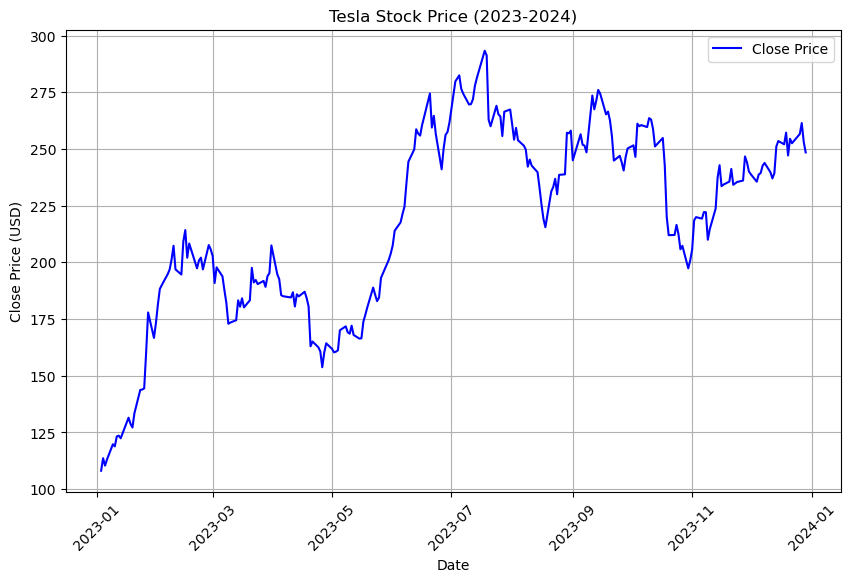

In [23]:
import yfinance as yf

# Define the make_graph function
def make_graph(data, title):
    import matplotlib.pyplot as plt
    
    if 'Date' not in data.columns or 'Close' not in data.columns:
        print("Error: 'Date' or 'Close' column not found in the dataframe.")
        return
    
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], color='blue', label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

try:
    # Extract Tesla stock data
    tesla_data = yf.download('TSLA', start='2023-01-01', end='2024-01-01')

    # Reset the index
    tesla_data.reset_index(inplace=True)

    # Plot the graph
    make_graph(tesla_data, title='Tesla Stock Price (2023-2024)')

except Exception as e:
    print("An error occurred:", e)


[*********************100%%**********************]  1 of 1 completed


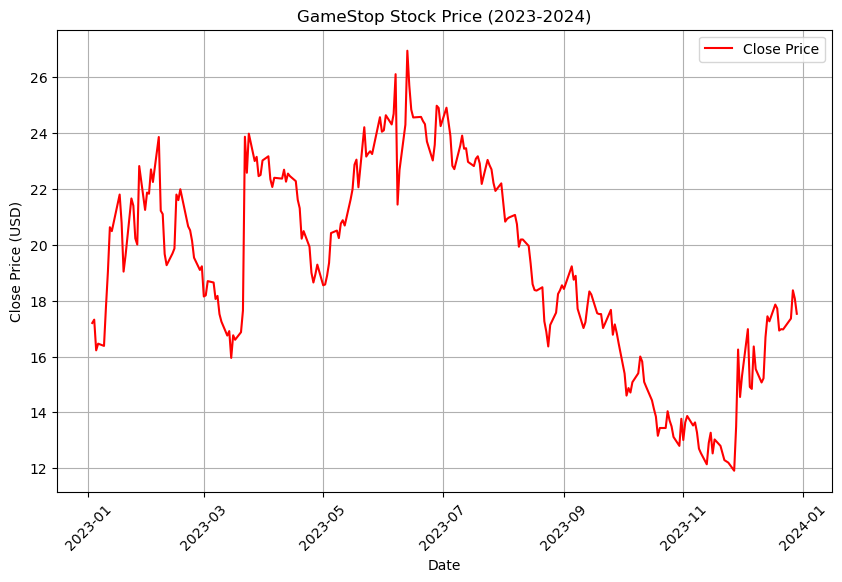

In [24]:
import yfinance as yf

# Define the make_graph function
def make_graph(data, title):
    import matplotlib.pyplot as plt
    
    if 'Date' not in data.columns or 'Close' not in data.columns:
        print("Error: 'Date' or 'Close' column not found in the dataframe.")
        return
    
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], color='red', label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

try:
    # Extract GameStop stock data
    gme_data = yf.download('GME', start='2023-01-01', end='2024-01-01')

    # Reset the index
    gme_data.reset_index(inplace=True)

    # Plot the graph
    make_graph(gme_data, title='GameStop Stock Price (2023-2024)')

except Exception as e:
    print("An error occurred:", e)
